In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Caricamento dati (adatta i percorsi o i metodi di lettura ai tuoi file)
migration_df = pd.read_csv('..\data\population\low_HDI.csv')
homicide_df = pd.read_csv('..\data\crime\police_recorded_offences\homicide.csv')
total_population_df = pd.read_csv('..\data\population\\total.csv')

# Pre-elaborazione del dataset di migrazione
migration_df = migration_df.rename(columns={"geo": "country", "TIME_PERIOD": "year", "OBS_VALUE": "low_hdi_population"})
migration_df["low_hdi_population"] = pd.to_numeric(migration_df["low_hdi_population"], errors="coerce")
migration_df = migration_df.groupby(["country", "year"])["low_hdi_population"].sum().reset_index()

# Calcolo della percentuale di popolazione da paesi con HDI basso
# Supponendo che tu abbia i dati sulla popolazione totale (adattali se necessario)
# Esempio per una colonna totale popolazione chiamata 'total_population'
# migration_df["low_hdi_population_percentage"] = (
#     migration_df["low_hdi_population"] / migration_df["low_hdi_population"].sum() * 100
# )

migration_df

,country,year,low_hdi_population
0,Austria,2014,34395
1,Austria,2015,39360
2,Austria,2016,62642
3,Austria,2017,74981
4,Austria,2018,75520
...,...,...,...
309,United Kingdom,2015,708919
310,United Kingdom,2016,678462
311,United Kingdom,2017,677243
312,United Kingdom,2018,696137


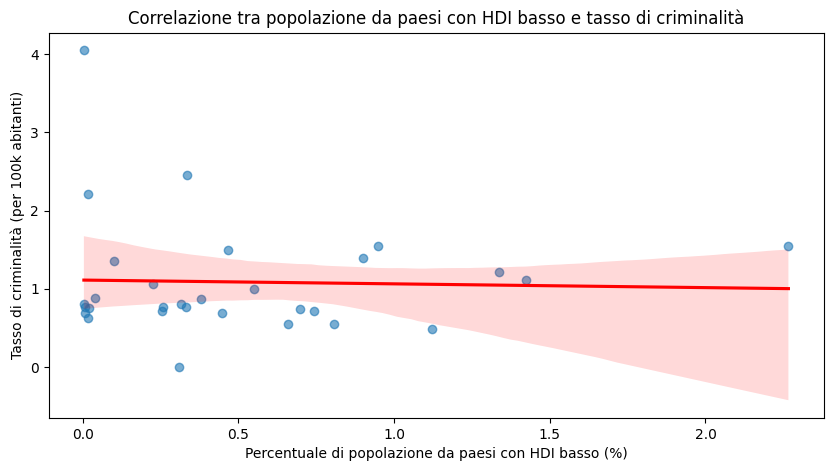

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

year = 2022

# Caricamento dei dati
migration_df = pd.read_csv('..\data\population\low_HDI.csv')
homicide_df = pd.read_csv('..\data\crime\police_recorded_offences\\homicide.csv')
total_population_df = pd.read_csv('..\data\population\\total.csv')

# Filtraggio per l'anno 2022
migration_df = migration_df[migration_df["TIME_PERIOD"] == year]
homicide_df = homicide_df[homicide_df["TIME_PERIOD"] == year]
total_population_df = total_population_df[total_population_df["TIME_PERIOD"] == year]

# Pre-elaborazione del dataset di migrazione
migration_df = migration_df.rename(columns={"geo": "country", "TIME_PERIOD": "year", "OBS_VALUE": "low_hdi_population"})
migration_df["low_hdi_population"] = pd.to_numeric(migration_df["low_hdi_population"], errors="coerce")
migration_df = migration_df.groupby(["country", "year"])["low_hdi_population"].sum().reset_index()

# Pre-elaborazione del dataset della popolazione totale
total_population_df = total_population_df.rename(columns={"geo": "country", "TIME_PERIOD": "year", "OBS_VALUE": "total_population"})
total_population_df["total_population"] = pd.to_numeric(total_population_df["total_population"], errors="coerce")

# Unione del dataset di migrazione con il dataset della popolazione totale
migration_df = pd.merge(
    migration_df,
    total_population_df,
    on=["country", "year"],
    how="inner"
)

# Calcolo della percentuale di popolazione proveniente da paesi con HDI basso
migration_df["low_hdi_population_percentage"] = (
    migration_df["low_hdi_population"] / migration_df["total_population"] * 100
)

# Pre-elaborazione del dataset di crimini
homicide_df = homicide_df.rename(columns={"geo": "country", "TIME_PERIOD": "year", "OBS_VALUE": "crime_rate"})
homicide_df["crime_rate"] = pd.to_numeric(homicide_df["crime_rate"], errors="coerce")

# Unione dei dataset (crimini e migrazione)
merged_df = pd.merge(
    homicide_df,
    migration_df,
    on=["country", "year"],
    how="inner"
)

# Scatter plot con regressione lineare per migliorare la comprensione della correlazione
plt.figure(figsize=(10, 5))
sns.regplot(
    data=merged_df,
    x="low_hdi_population_percentage",
    y="crime_rate",
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)
plt.title("Correlazione tra popolazione da paesi con HDI basso e tasso di criminalità")
plt.xlabel("Percentuale di popolazione da paesi con HDI basso (%)")
plt.ylabel("Tasso di criminalità (per 100k abitanti)")
plt.show()


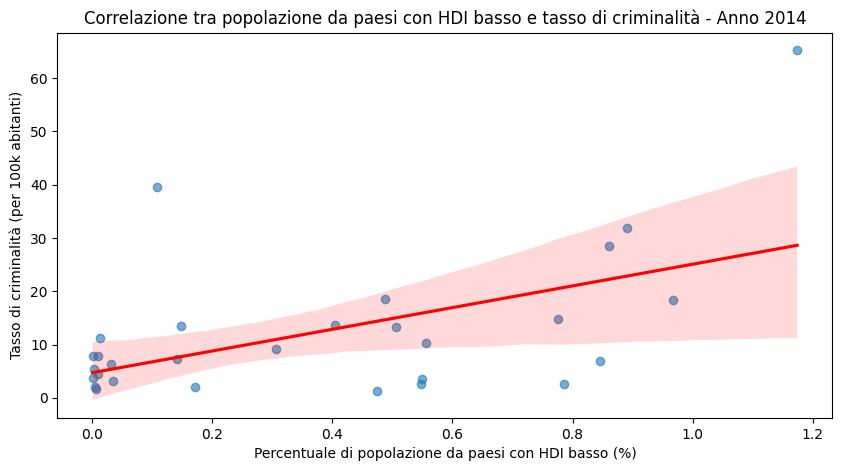

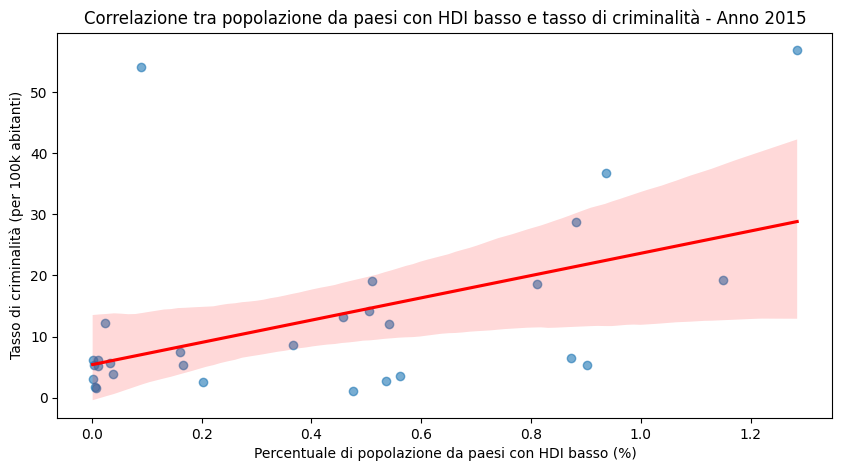

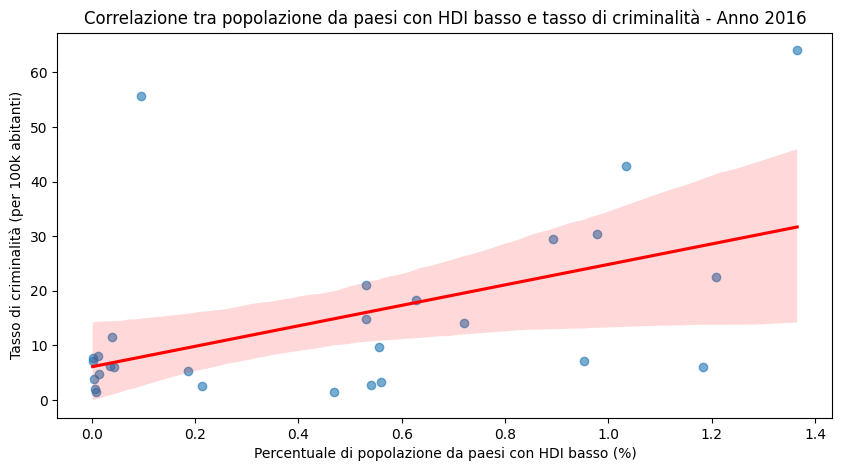

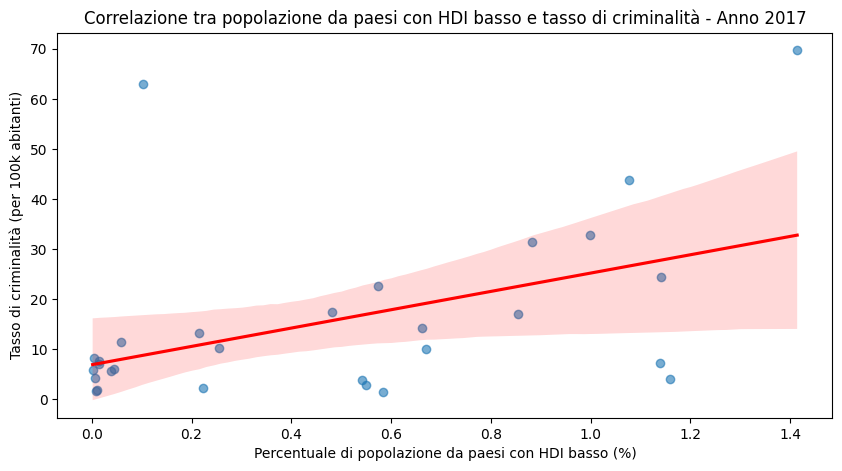

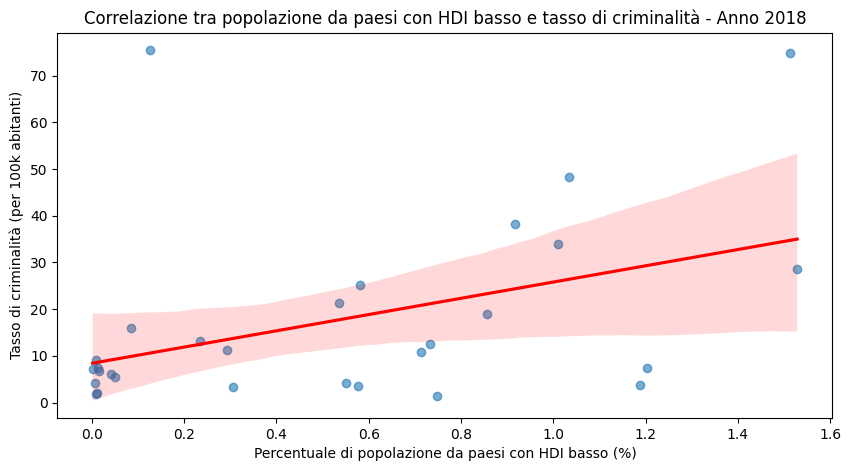

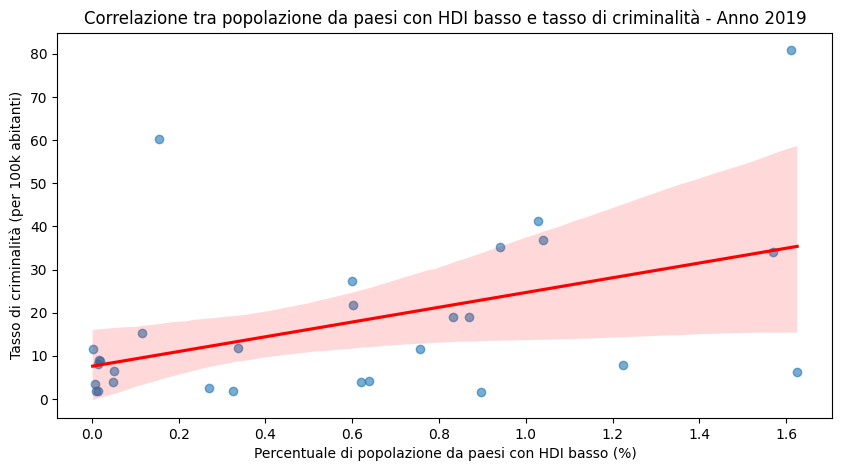

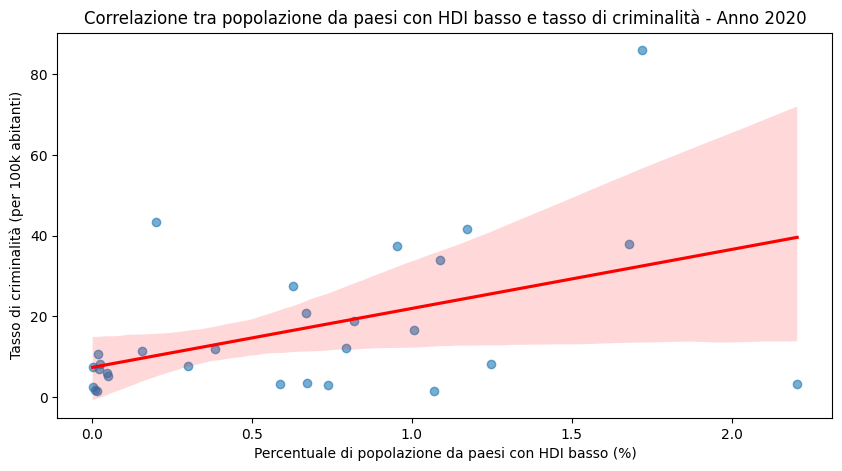

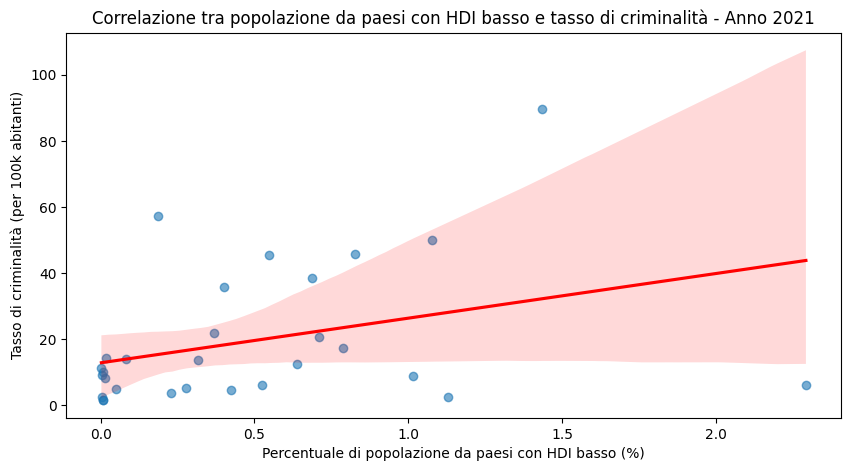

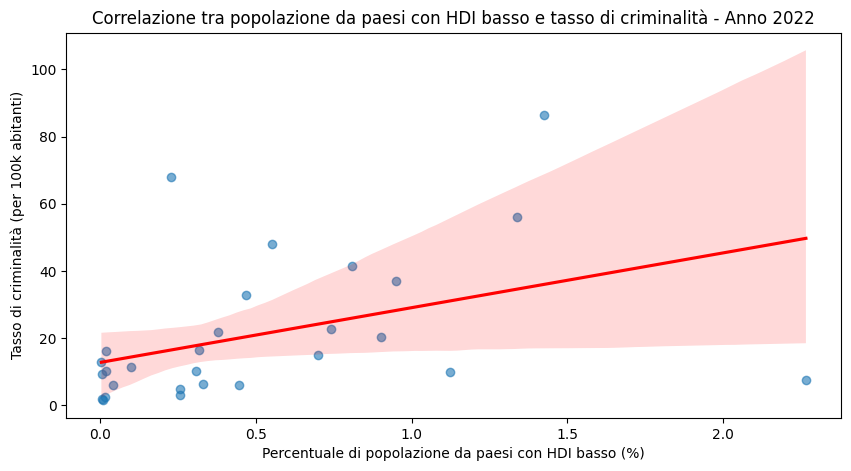

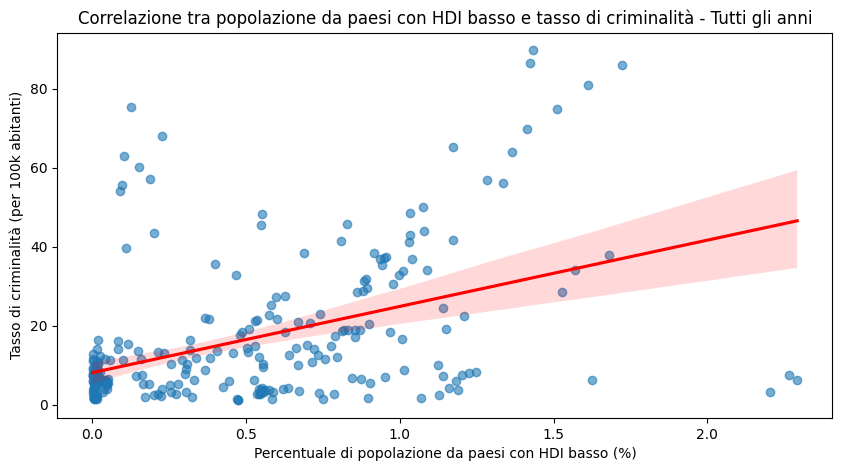

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Caricamento dei dati
migration_df = pd.read_csv('..\data\population\low_HDI.csv')
homicide_df = pd.read_csv('..\data\crime\police_recorded_offences\\rape.csv')
total_population_df = pd.read_csv('..\data\population\\total.csv')

# Pre-elaborazione del dataset di migrazione
migration_df = migration_df.rename(columns={"geo": "country", "TIME_PERIOD": "year", "OBS_VALUE": "low_hdi_population"})
migration_df["low_hdi_population"] = pd.to_numeric(migration_df["low_hdi_population"], errors="coerce")
migration_df = migration_df.groupby(["country", "year"])["low_hdi_population"].sum().reset_index()

# Pre-elaborazione del dataset della popolazione totale
total_population_df = total_population_df.rename(columns={"geo": "country", "TIME_PERIOD": "year", "OBS_VALUE": "total_population"})
total_population_df["total_population"] = pd.to_numeric(total_population_df["total_population"], errors="coerce")

# Unione del dataset di migrazione con il dataset della popolazione totale
migration_df = pd.merge(
    migration_df,
    total_population_df,
    on=["country", "year"],
    how="inner"
)

# Calcolo della percentuale di popolazione proveniente da paesi con HDI basso
migration_df["low_hdi_population_percentage"] = (
    migration_df["low_hdi_population"] / migration_df["total_population"] * 100
)

# Pre-elaborazione del dataset di crimini
homicide_df = homicide_df.rename(columns={"geo": "country", "TIME_PERIOD": "year", "OBS_VALUE": "crime_rate"})
homicide_df["crime_rate"] = pd.to_numeric(homicide_df["crime_rate"], errors="coerce")

# Unione dei dataset (crimini e migrazione)
merged_df = pd.merge(
    homicide_df,
    migration_df,
    on=["country", "year"],
    how="inner"
)

# Lista di anni unici nei dati
years = sorted(merged_df["year"].unique())

# Grafici per ogni anno
for year in years:
    yearly_data = merged_df[merged_df["year"] == year]
    plt.figure(figsize=(10, 5))
    sns.regplot(
        data=yearly_data,
        x="low_hdi_population_percentage",
        y="crime_rate",
        scatter_kws={'alpha': 0.6},
        line_kws={'color': 'red'}
    )
    plt.title(f"Correlazione tra popolazione da paesi con HDI basso e tasso di criminalità - Anno {year}")
    plt.xlabel("Percentuale di popolazione da paesi con HDI basso (%)")
    plt.ylabel("Tasso di criminalità (per 100k abitanti)")
    plt.show()

# Grafico combinato per tutti gli anni
plt.figure(figsize=(10, 5))
sns.regplot(
    data=merged_df,
    x="low_hdi_population_percentage",
    y="crime_rate",
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)
plt.title("Correlazione tra popolazione da paesi con HDI basso e tasso di criminalità - Tutti gli anni")
plt.xlabel("Percentuale di popolazione da paesi con HDI basso (%)")
plt.ylabel("Tasso di criminalità (per 100k abitanti)")
plt.show()


Generando grafici per Homicide...


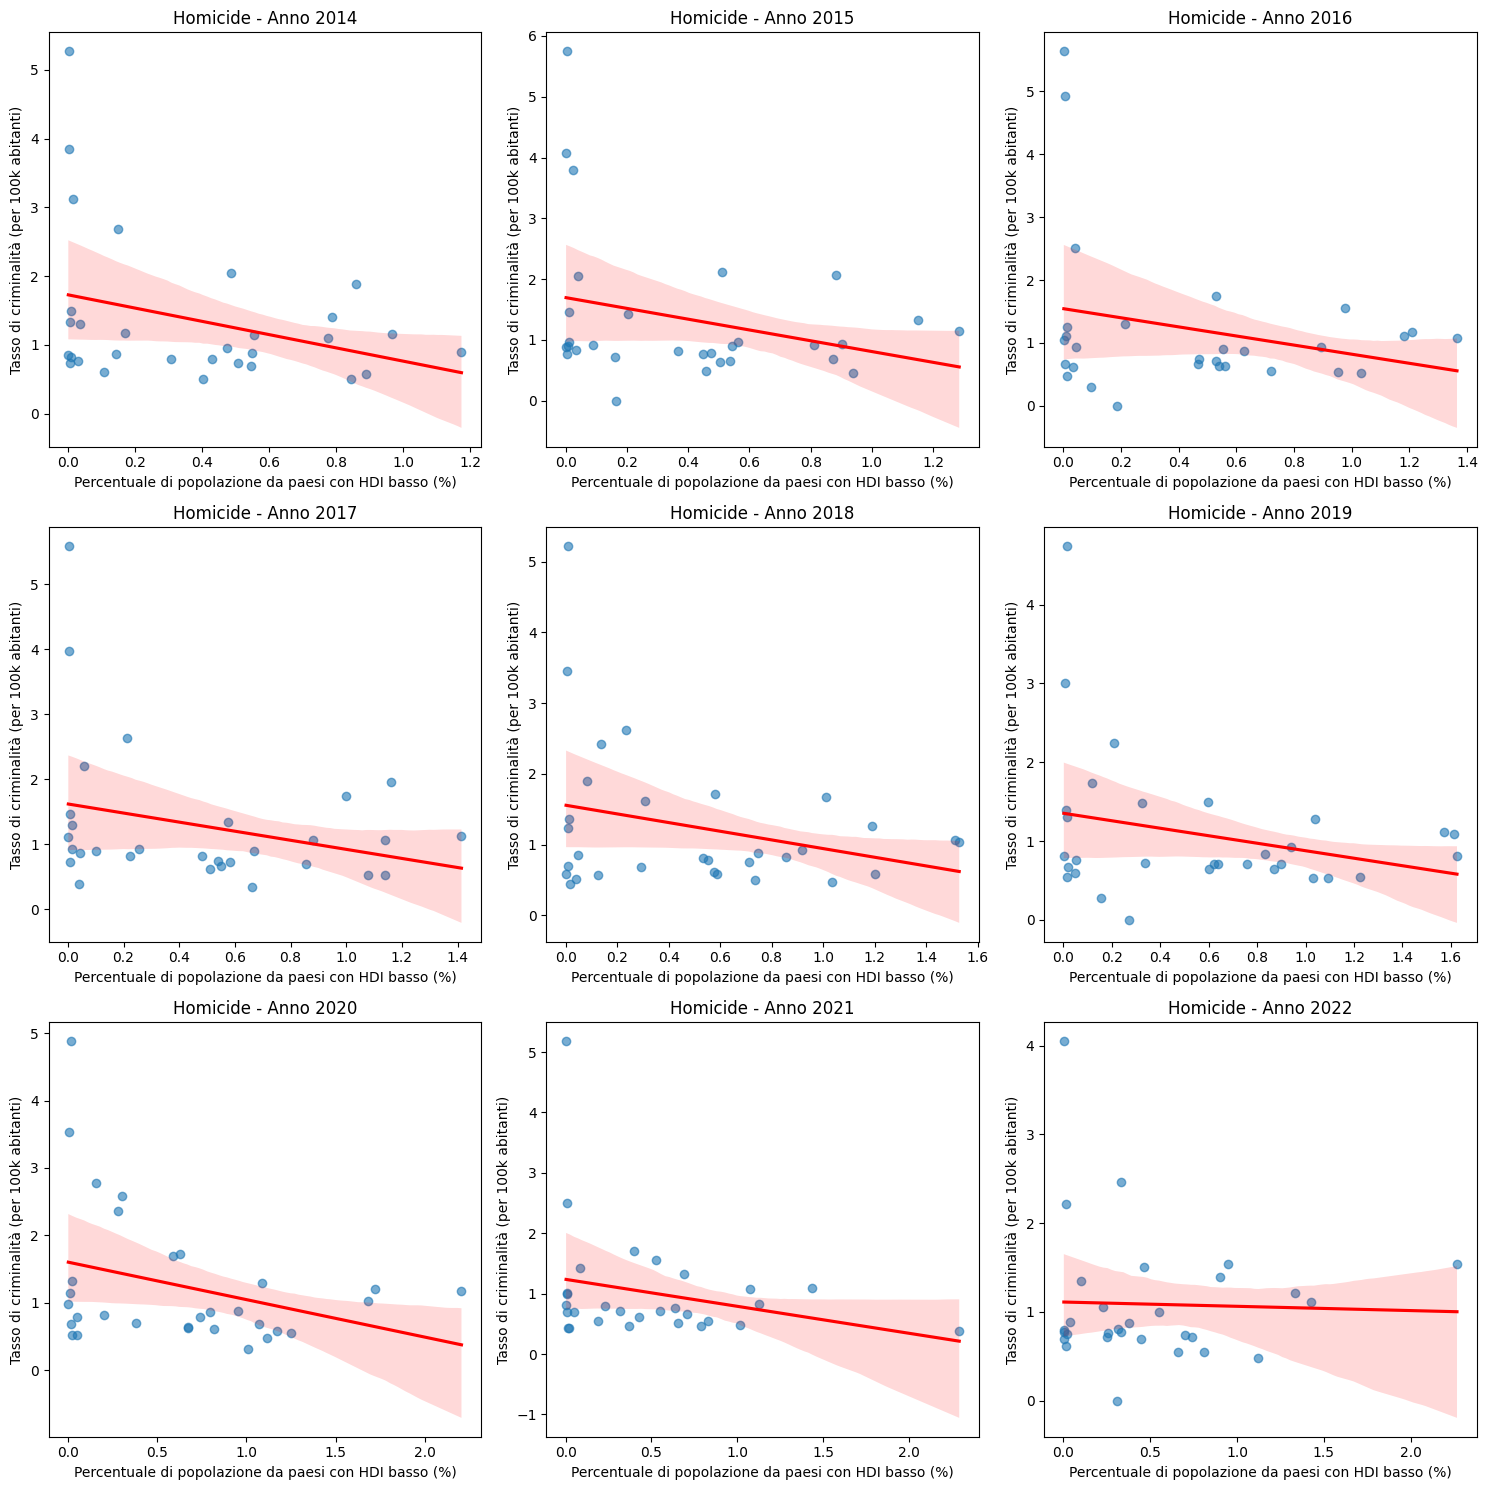

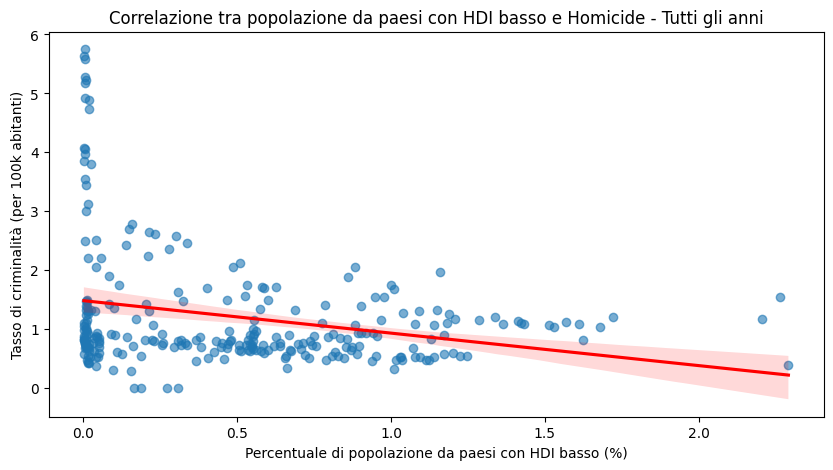

Generando grafici per Rape...


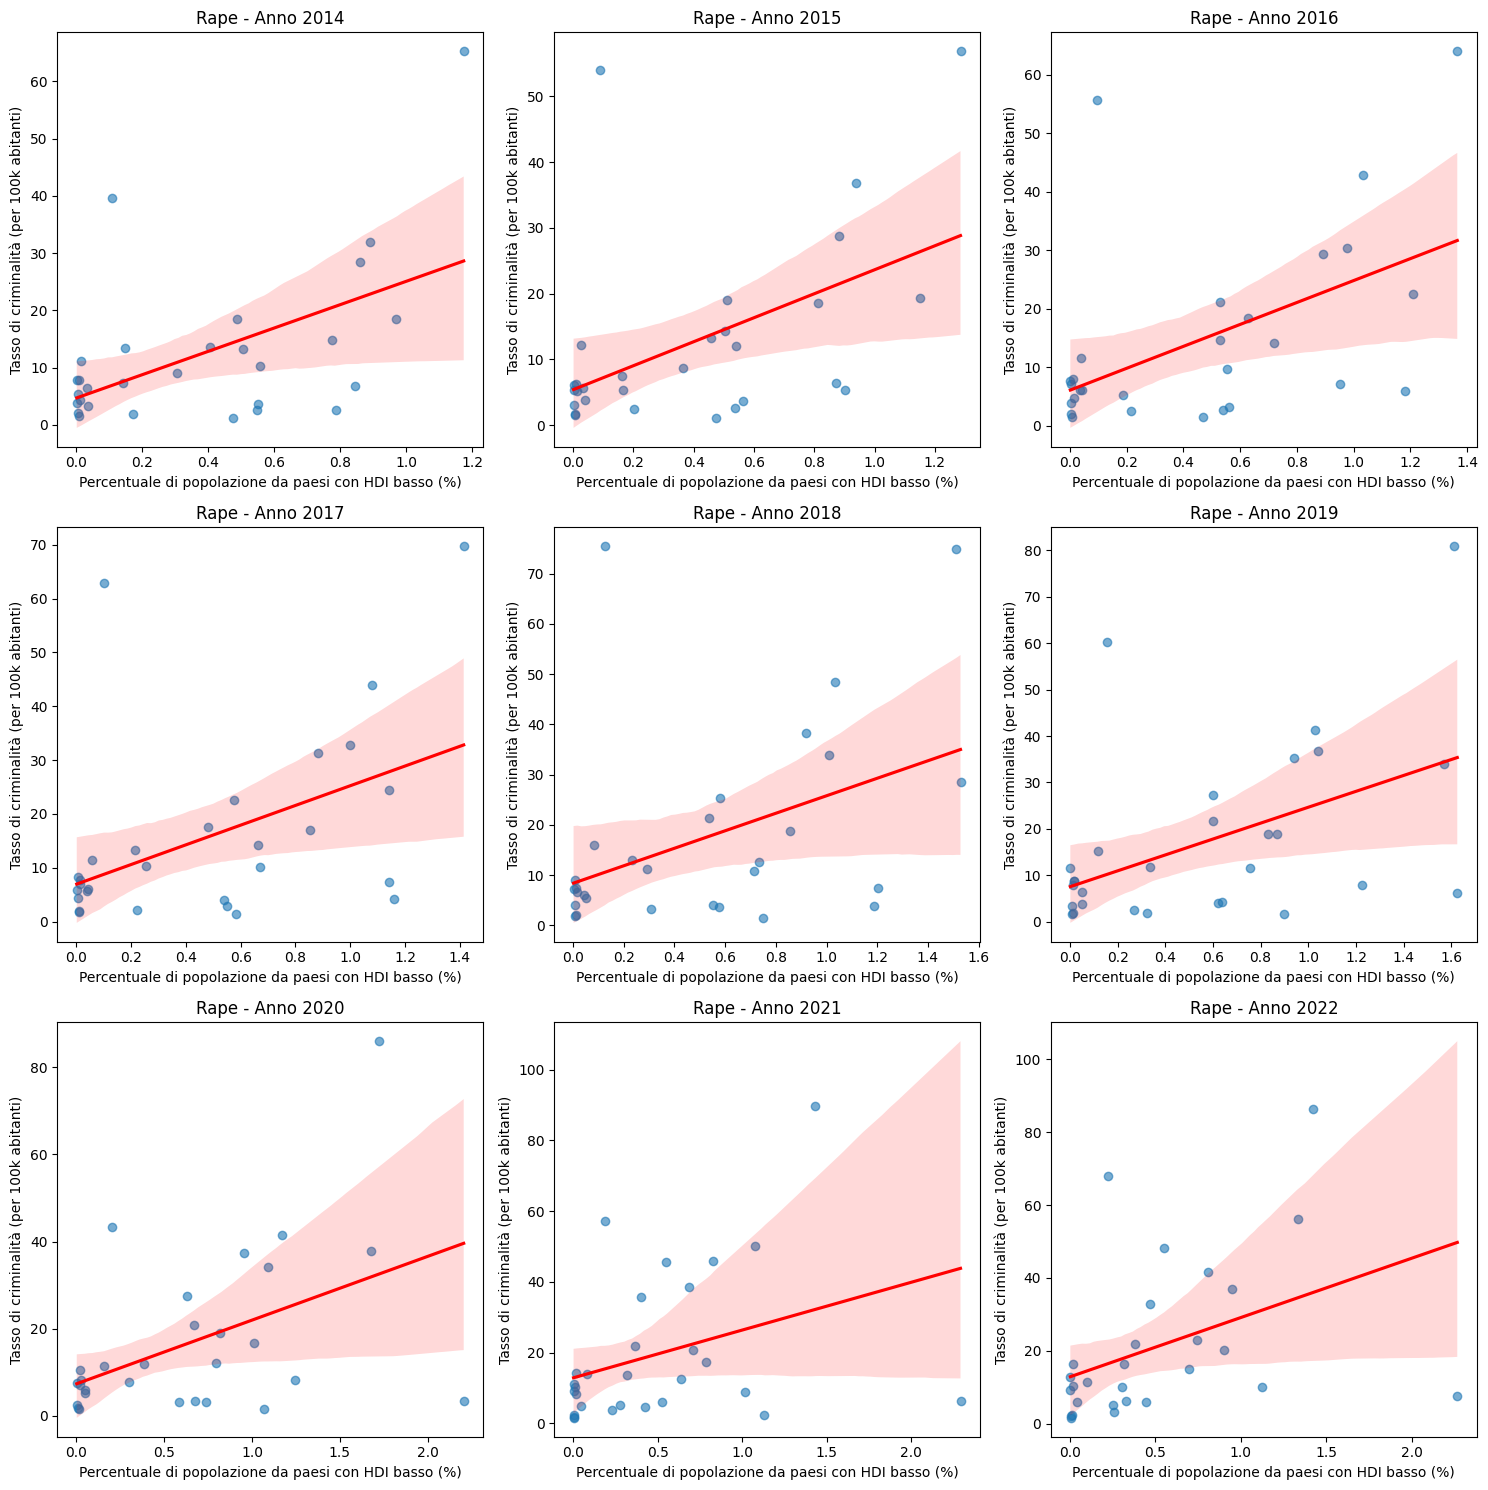

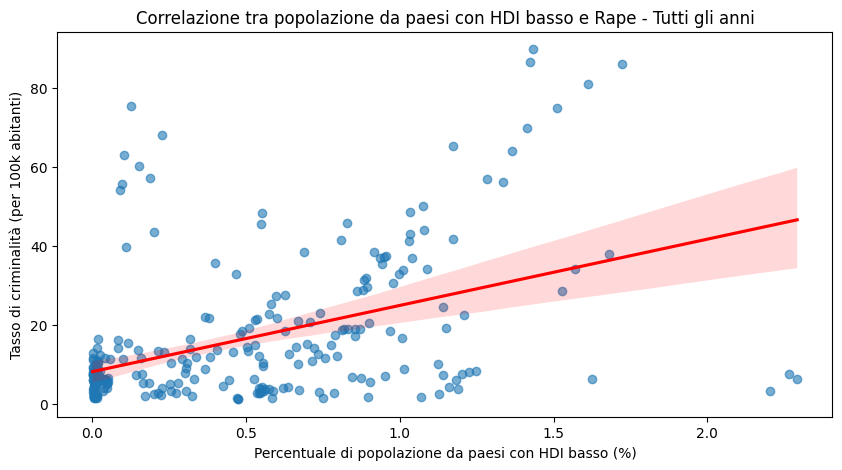

Generando grafici per Sexual Assault...


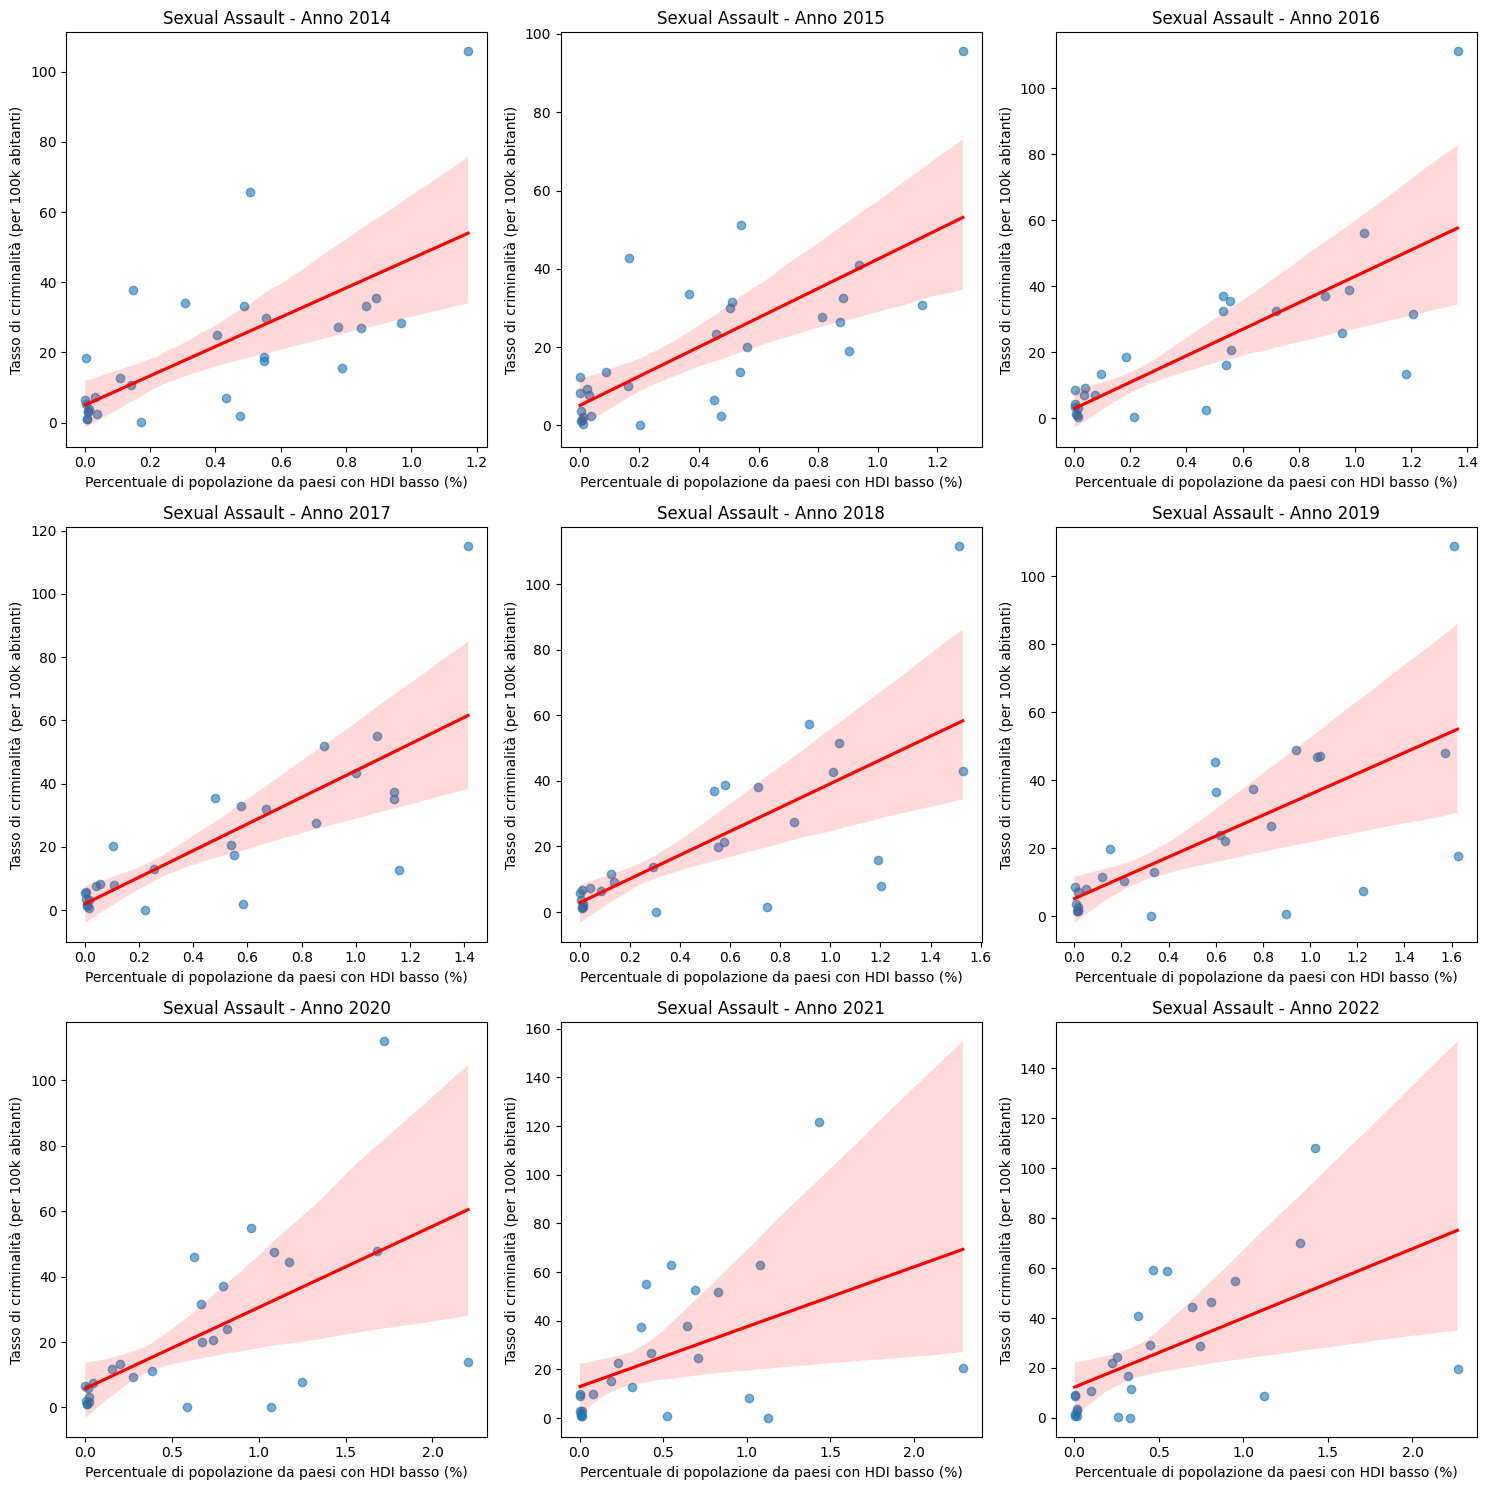

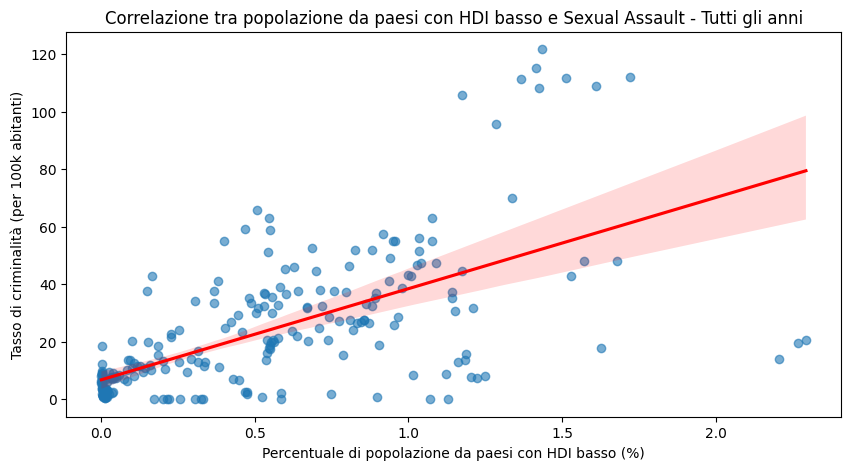

Generando grafici per Theft...


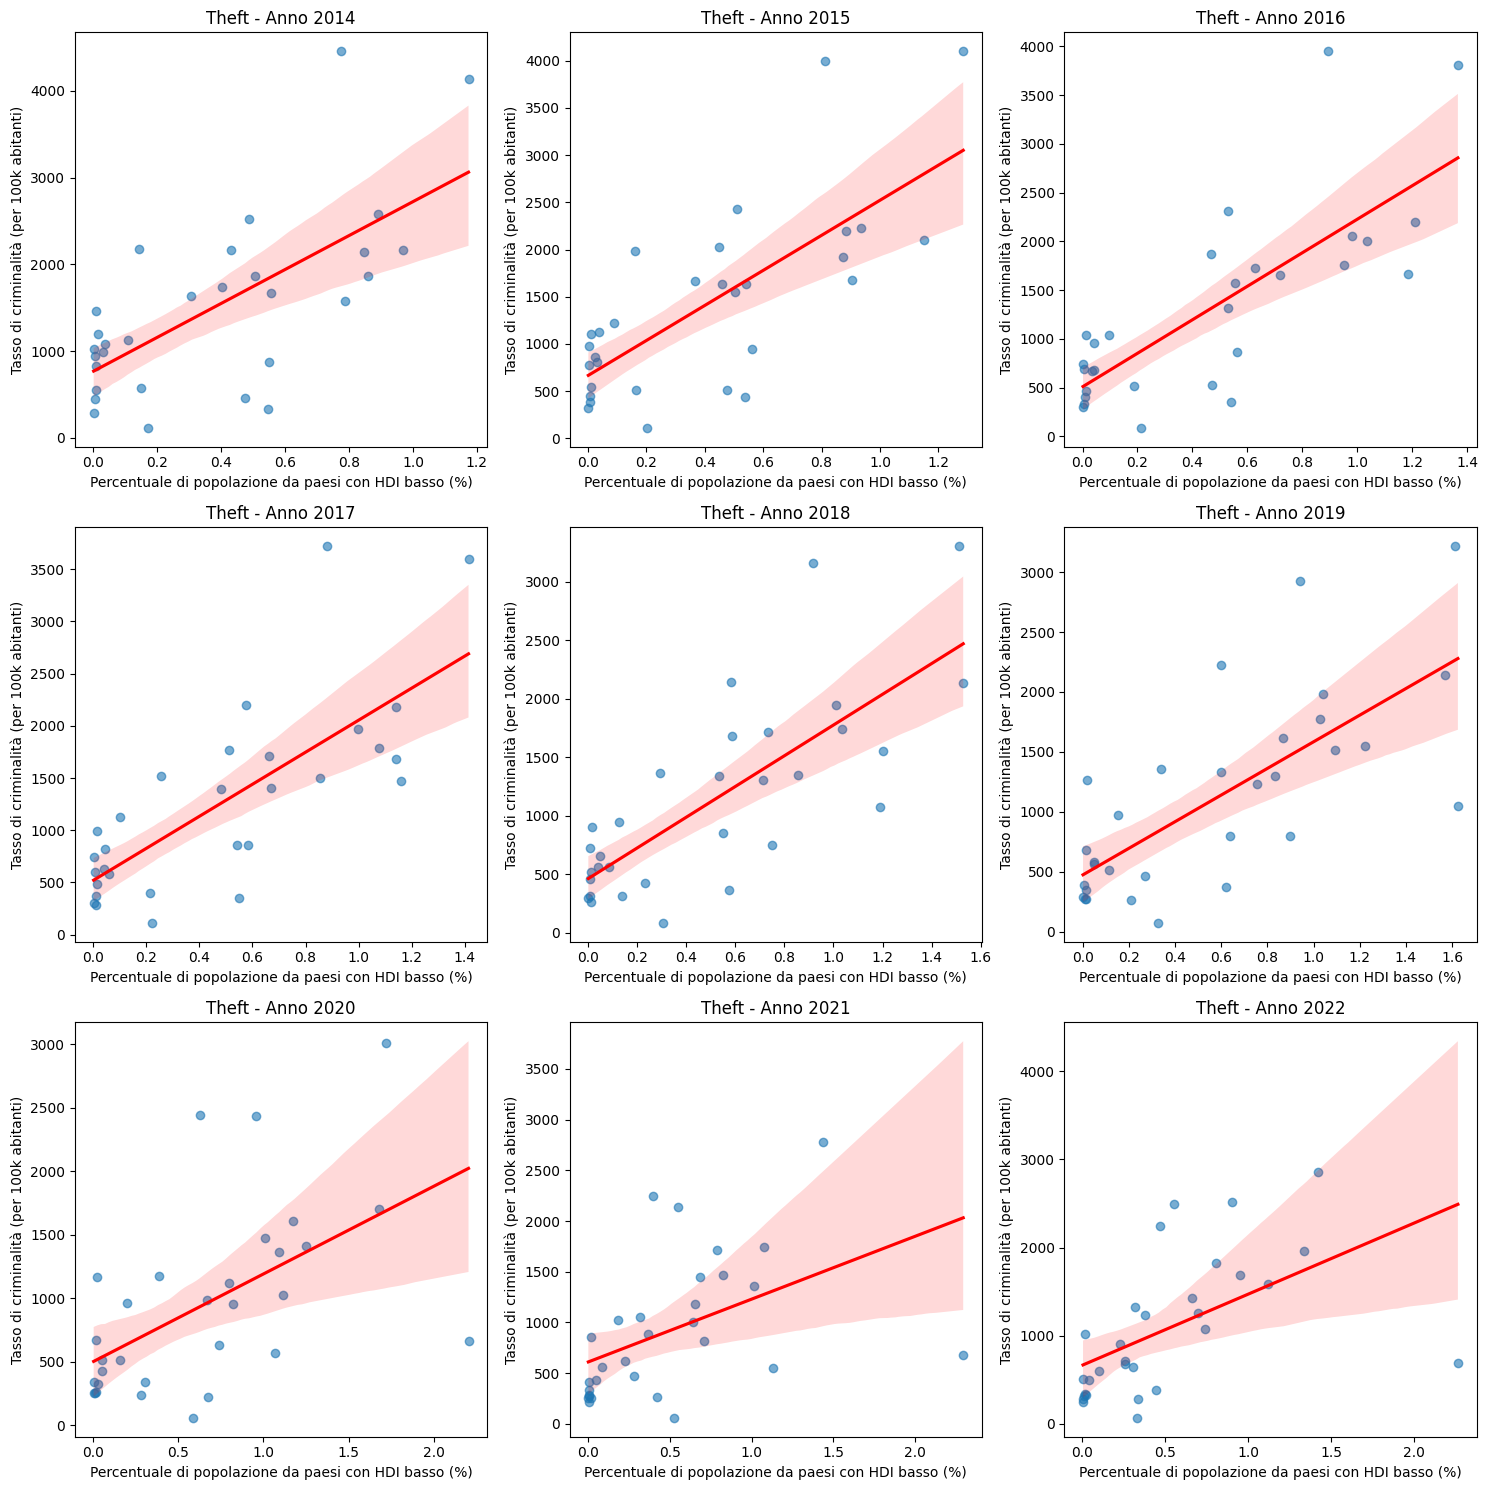

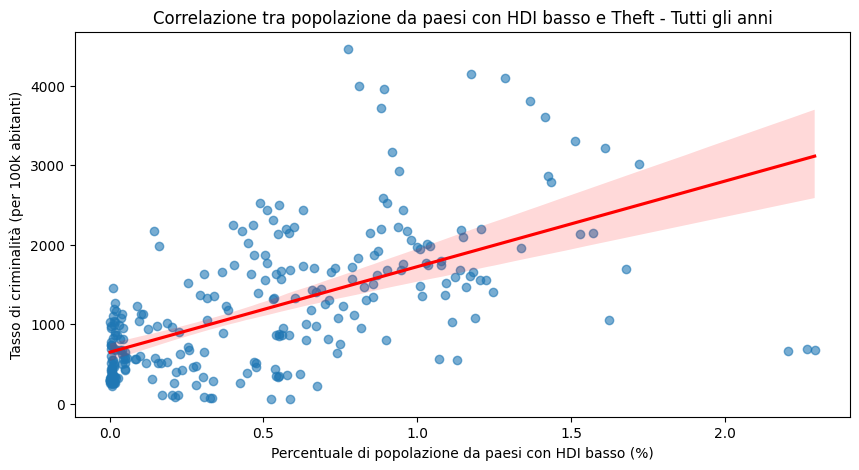

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Caricamento dei dati
crime_files = {
    "Homicide": '..\data\crime\police_recorded_offences\\homicide.csv',
    "Rape": '..\data\crime\police_recorded_offences\\rape.csv',
    "Sexual Assault": '..\data\crime\police_recorded_offences\\sexual_assault.csv',
    "Theft": '..\data\crime\police_recorded_offences\\theft.csv'
}

migration_df = pd.read_csv('..\data\population\low_HDI.csv')
total_population_df = pd.read_csv('..\data\population\\total.csv')

# Pre-elaborazione del dataset di migrazione
migration_df = migration_df.rename(columns={"geo": "country", "TIME_PERIOD": "year", "OBS_VALUE": "low_hdi_population"})
migration_df["low_hdi_population"] = pd.to_numeric(migration_df["low_hdi_population"], errors="coerce")
migration_df = migration_df.groupby(["country", "year"])["low_hdi_population"].sum().reset_index()

# Pre-elaborazione del dataset della popolazione totale
total_population_df = total_population_df.rename(columns={"geo": "country", "TIME_PERIOD": "year", "OBS_VALUE": "total_population"})
total_population_df["total_population"] = pd.to_numeric(total_population_df["total_population"], errors="coerce")

# Unione del dataset di migrazione con il dataset della popolazione totale
migration_df = pd.merge(
    migration_df,
    total_population_df,
    on=["country", "year"],
    how="inner"
)

# Calcolo della percentuale di popolazione proveniente da paesi con HDI basso
migration_df["low_hdi_population_percentage"] = (
    migration_df["low_hdi_population"] / migration_df["total_population"] * 100
)

# Funzione per creare i grafici
def create_crime_plots(crime_name, crime_file):
    crime_df = pd.read_csv(crime_file)
    crime_df = crime_df.rename(columns={"geo": "country", "TIME_PERIOD": "year", "OBS_VALUE": "crime_rate"})
    crime_df["crime_rate"] = pd.to_numeric(crime_df["crime_rate"], errors="coerce")

    # Unione dei dataset (crimini e migrazione)
    merged_df = pd.merge(
        crime_df,
        migration_df,
        on=["country", "year"],
        how="inner"
    )
    
    # Lista di anni unici
    years = sorted(merged_df["year"].unique())

    # Grafici per ogni anno
    num_years = len(years)
    cols = 3
    rows = (num_years + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.flatten()

    for i, year in enumerate(years):
        yearly_data = merged_df[merged_df["year"] == year]
        sns.regplot(
            data=yearly_data,
            x="low_hdi_population_percentage",
            y="crime_rate",
            scatter_kws={'alpha': 0.6},
            line_kws={'color': 'red'},
            ax=axes[i]
        )
        axes[i].set_title(f"{crime_name} - Anno {year}")
        axes[i].set_xlabel("Percentuale di popolazione da paesi con HDI basso (%)")
        axes[i].set_ylabel("Tasso di criminalità (per 100k abitanti)")

    # Nascondere assi inutilizzati
    for i in range(num_years, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

    # Grafico combinato per tutti gli anni
    plt.figure(figsize=(10, 5))
    sns.regplot(
        data=merged_df,
        x="low_hdi_population_percentage",
        y="crime_rate",
        scatter_kws={'alpha': 0.6},
        line_kws={'color': 'red'}
    )
    plt.title(f"Correlazione tra popolazione da paesi con HDI basso e {crime_name} - Tutti gli anni")
    plt.xlabel("Percentuale di popolazione da paesi con HDI basso (%)")
    plt.ylabel("Tasso di criminalità (per 100k abitanti)")
    plt.show()

# Creazione dei grafici per ogni tipo di crimine
for crime_name, crime_file in crime_files.items():
    print(f"Generando grafici per {crime_name}...")
    create_crime_plots(crime_name, crime_file)


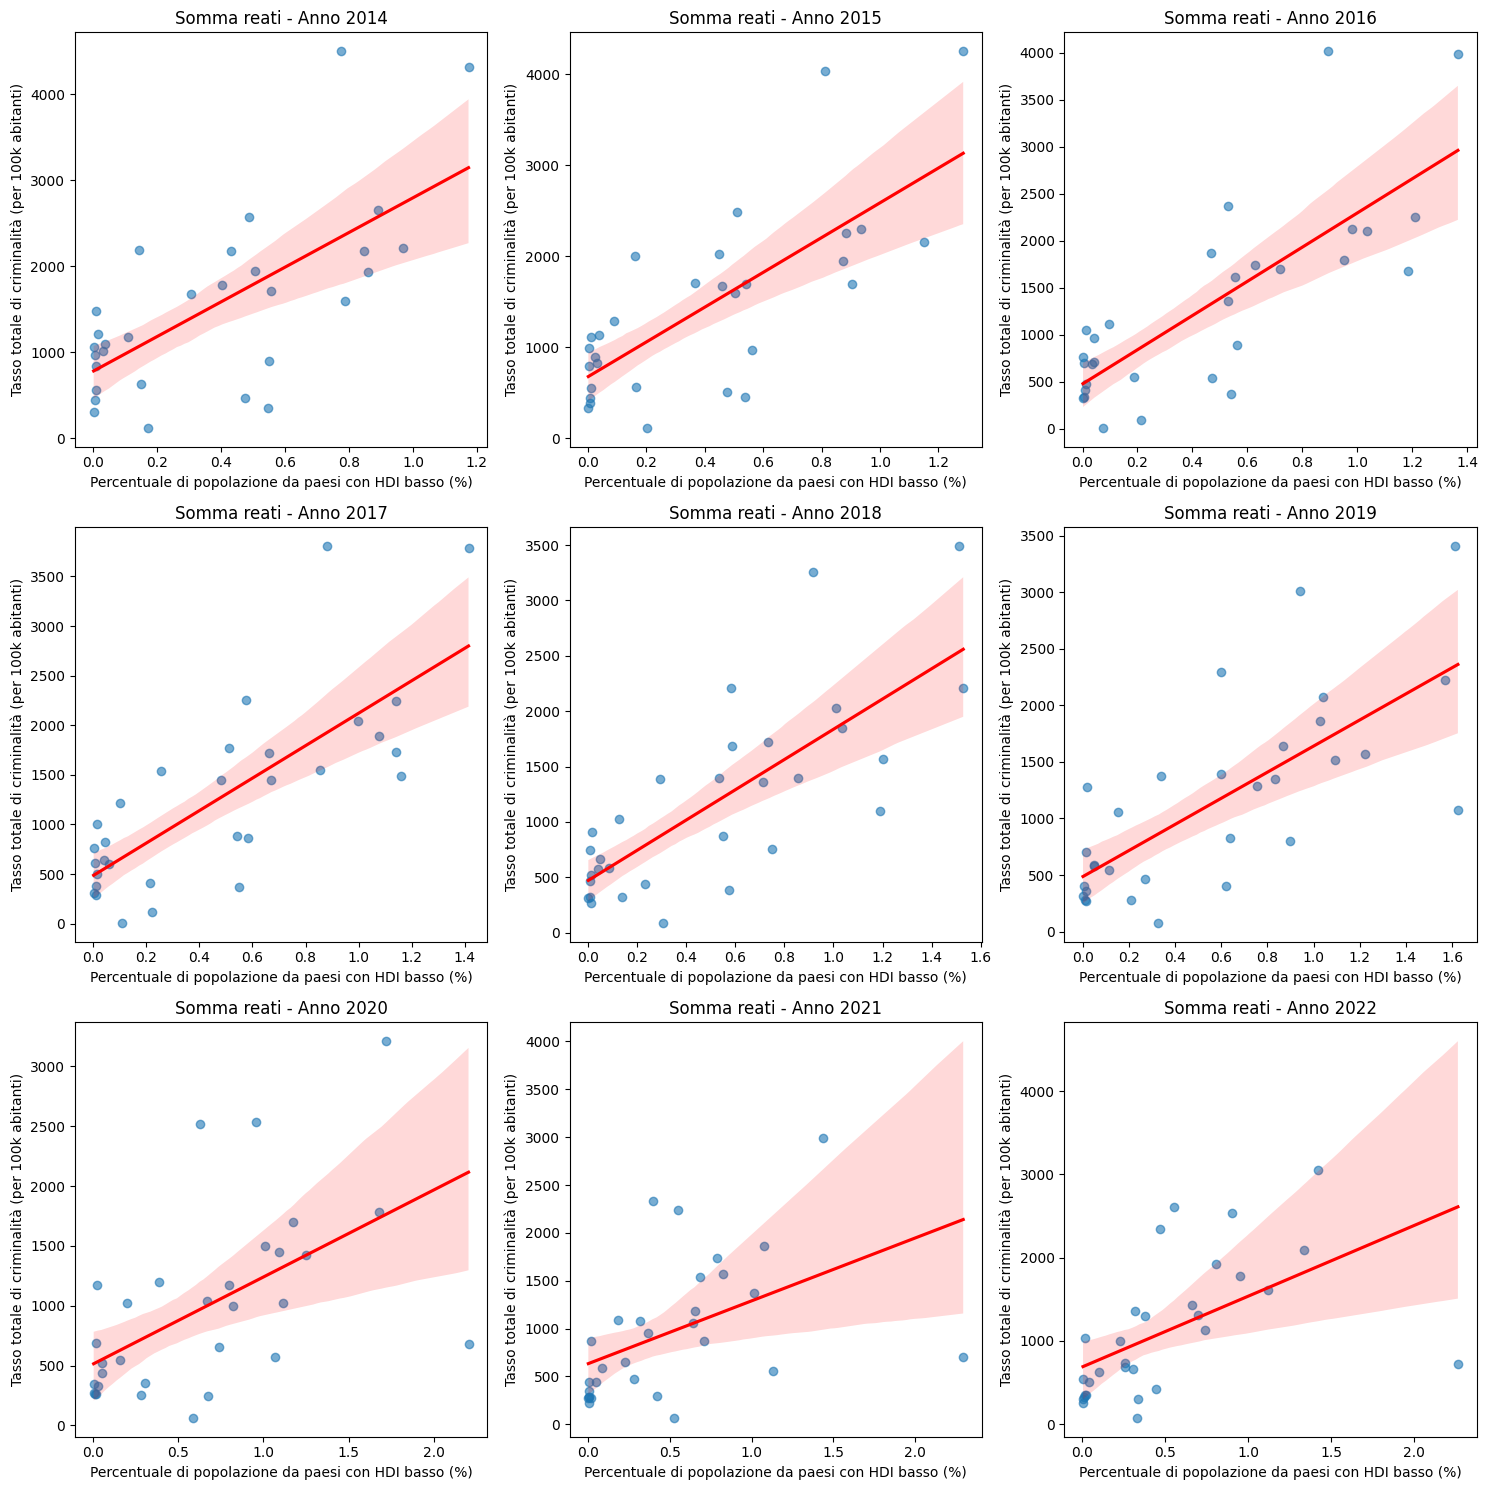

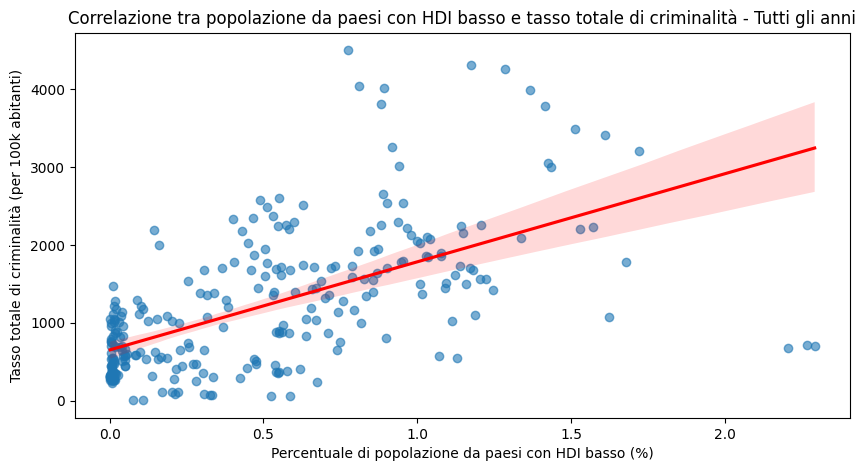

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Caricamento dei dati
crime_files = {
    "Homicide": '..\data\crime\police_recorded_offences\\homicide.csv',
    "Rape": '..\data\crime\police_recorded_offences\\rape.csv',
    "Sexual Assault": '..\data\crime\police_recorded_offences\\sexual_assault.csv',
    "Theft": '..\data\crime\police_recorded_offences\\theft.csv'
}

migration_df = pd.read_csv('..\data\population\low_HDI.csv')
total_population_df = pd.read_csv('..\data\population\\total.csv')

# Pre-elaborazione del dataset di migrazione
migration_df = migration_df.rename(columns={"geo": "country", "TIME_PERIOD": "year", "OBS_VALUE": "low_hdi_population"})
migration_df["low_hdi_population"] = pd.to_numeric(migration_df["low_hdi_population"], errors="coerce")
migration_df = migration_df.groupby(["country", "year"])["low_hdi_population"].sum().reset_index()

# Pre-elaborazione del dataset della popolazione totale
total_population_df = total_population_df.rename(columns={"geo": "country", "TIME_PERIOD": "year", "OBS_VALUE": "total_population"})
total_population_df["total_population"] = pd.to_numeric(total_population_df["total_population"], errors="coerce")

# Unione del dataset di migrazione con il dataset della popolazione totale
migration_df = pd.merge(
    migration_df,
    total_population_df,
    on=["country", "year"],
    how="inner"
)

# Calcolo della percentuale di popolazione proveniente da paesi con HDI basso
migration_df["low_hdi_population_percentage"] = (
    migration_df["low_hdi_population"] / migration_df["total_population"] * 100
)

# Somma dei reati per ogni anno e paese
crime_data = []
for crime_name, crime_file in crime_files.items():
    crime_df = pd.read_csv(crime_file)
    crime_df = crime_df.rename(columns={"geo": "country", "TIME_PERIOD": "year", "OBS_VALUE": "crime_rate"})
    crime_df["crime_rate"] = pd.to_numeric(crime_df["crime_rate"], errors="coerce")
    crime_data.append(crime_df)

# Concatenazione e somma dei reati
all_crimes_df = pd.concat(crime_data)
aggregated_crimes_df = all_crimes_df.groupby(["country", "year"])["crime_rate"].sum().reset_index()
aggregated_crimes_df = aggregated_crimes_df.rename(columns={"crime_rate": "total_crime_rate"})

# Unione dei dataset (crimini sommati e migrazione)
merged_df = pd.merge(
    aggregated_crimes_df,
    migration_df,
    on=["country", "year"],
    how="inner"
)

# Lista di anni unici
years = sorted(merged_df["year"].unique())

# Grafici per ogni anno
num_years = len(years)
cols = 3
rows = (num_years + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, year in enumerate(years):
    yearly_data = merged_df[merged_df["year"] == year]
    sns.regplot(
        data=yearly_data,
        x="low_hdi_population_percentage",
        y="total_crime_rate",
        scatter_kws={'alpha': 0.6},
        line_kws={'color': 'red'},
        ax=axes[i]
    )
    axes[i].set_title(f"Somma reati - Anno {year}")
    axes[i].set_xlabel("Percentuale di popolazione da paesi con HDI basso (%)")
    axes[i].set_ylabel("Tasso totale di criminalità (per 100k abitanti)")

# Nascondere assi inutilizzati
for i in range(num_years, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Grafico combinato per tutti gli anni
plt.figure(figsize=(10, 5))
sns.regplot(
    data=merged_df,
    x="low_hdi_population_percentage",
    y="total_crime_rate",
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)
plt.title("Correlazione tra popolazione da paesi con HDI basso e tasso totale di criminalità - Tutti gli anni")
plt.xlabel("Percentuale di popolazione da paesi con HDI basso (%)")
plt.ylabel("Tasso totale di criminalità (per 100k abitanti)")

plt.show()


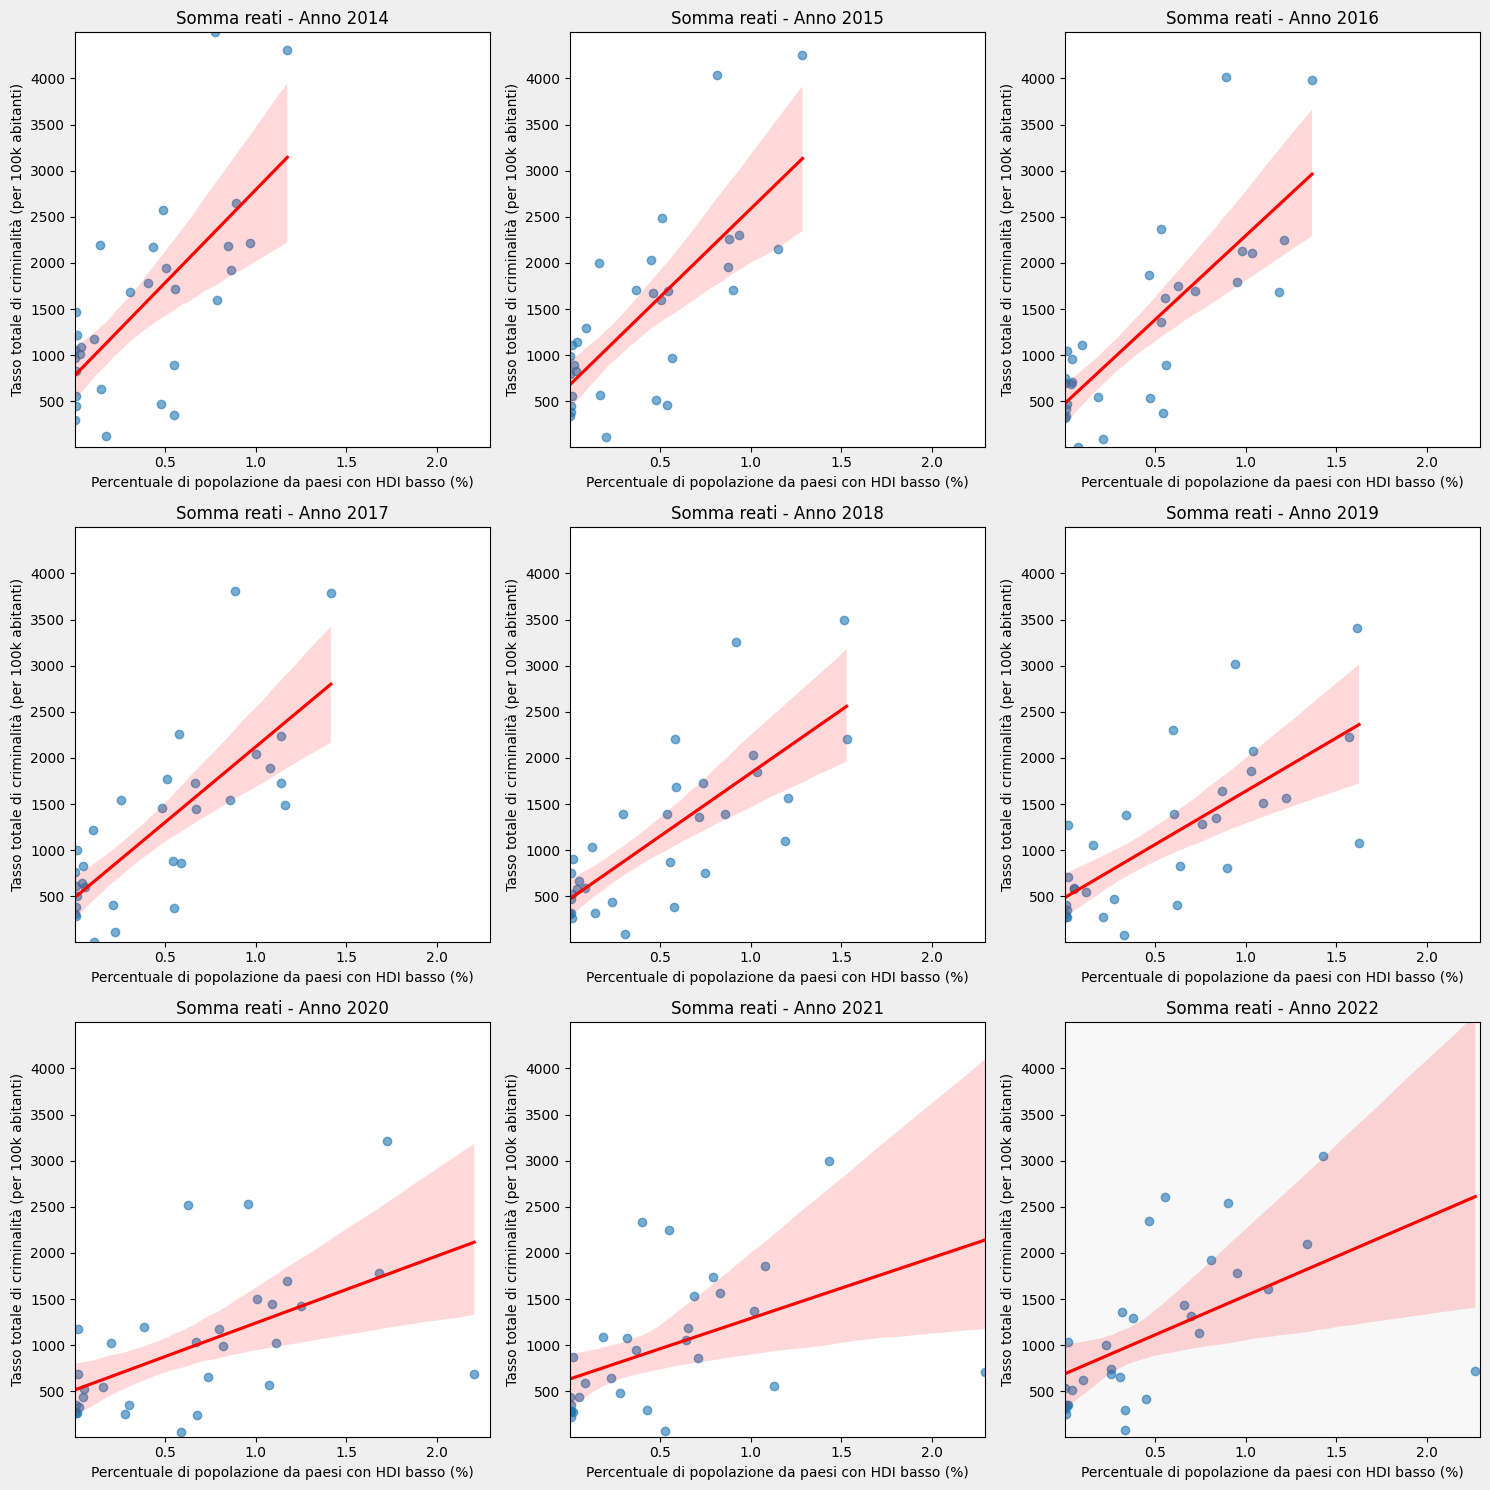

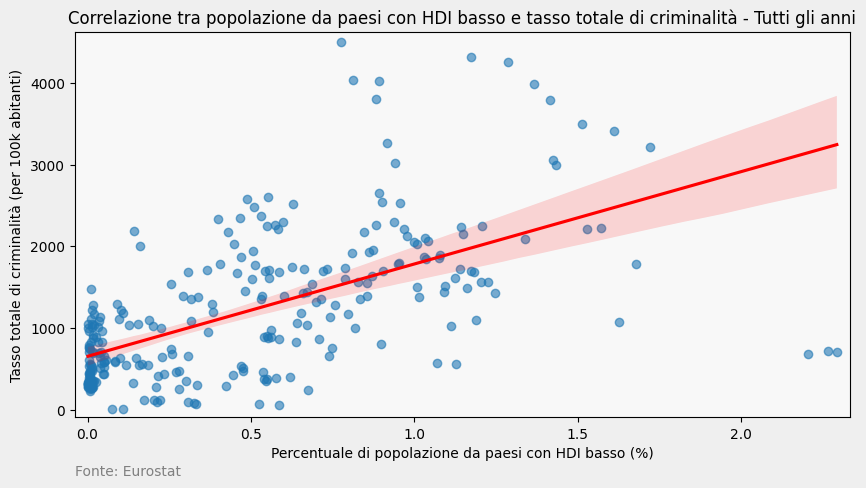

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Caricamento dei dati
crime_files = {
    "Homicide": '..\data\crime\police_recorded_offences\\homicide.csv',
    "Rape": '..\data\crime\police_recorded_offences\\rape.csv',
    "Sexual Assault": '..\data\crime\police_recorded_offences\\sexual_assault.csv',
    "Theft": '..\data\crime\police_recorded_offences\\theft.csv'
}

migration_df = pd.read_csv('..\data\population\low_HDI.csv')
total_population_df = pd.read_csv('..\data\population\\total.csv')

# Pre-elaborazione del dataset di migrazione
migration_df = migration_df.rename(columns={"geo": "country", "TIME_PERIOD": "year", "OBS_VALUE": "low_hdi_population"})
migration_df["low_hdi_population"] = pd.to_numeric(migration_df["low_hdi_population"], errors="coerce")
migration_df = migration_df.groupby(["country", "year"])["low_hdi_population"].sum().reset_index()

# Pre-elaborazione del dataset della popolazione totale
total_population_df = total_population_df.rename(columns={"geo": "country", "TIME_PERIOD": "year", "OBS_VALUE": "total_population"})
total_population_df["total_population"] = pd.to_numeric(total_population_df["total_population"], errors="coerce")

# Unione del dataset di migrazione con il dataset della popolazione totale
migration_df = pd.merge(
    migration_df,
    total_population_df,
    on=["country", "year"],
    how="inner"
)

# Calcolo della percentuale di popolazione proveniente da paesi con HDI basso
migration_df["low_hdi_population_percentage"] = (
    migration_df["low_hdi_population"] / migration_df["total_population"] * 100
)

# Somma dei reati per ogni anno e paese
crime_data = []
for crime_name, crime_file in crime_files.items():
    crime_df = pd.read_csv(crime_file)
    crime_df = crime_df.rename(columns={"geo": "country", "TIME_PERIOD": "year", "OBS_VALUE": "crime_rate"})
    crime_df["crime_rate"] = pd.to_numeric(crime_df["crime_rate"], errors="coerce")
    crime_data.append(crime_df)

# Concatenazione e somma dei reati
all_crimes_df = pd.concat(crime_data)
aggregated_crimes_df = all_crimes_df.groupby(["country", "year"])["crime_rate"].sum().reset_index()
aggregated_crimes_df = aggregated_crimes_df.rename(columns={"crime_rate": "total_crime_rate"})

# Unione dei dataset (crimini sommati e migrazione)
merged_df = pd.merge(
    aggregated_crimes_df,
    migration_df,
    on=["country", "year"],
    how="inner"
)

# Calcolo dei limiti globali per le scale
x_min, x_max = merged_df["low_hdi_population_percentage"].min(), merged_df["low_hdi_population_percentage"].max()
y_min, y_max = merged_df["total_crime_rate"].min(), merged_df["total_crime_rate"].max()

# Lista di anni unici
years = sorted(merged_df["year"].unique())

# Grafici per ogni anno
num_years = len(years)
cols = 3
rows = (num_years + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, year in enumerate(years):
    yearly_data = merged_df[merged_df["year"] == year]
    sns.regplot(
        data=yearly_data,
        x="low_hdi_population_percentage",
        y="total_crime_rate",
        scatter_kws={'alpha': 0.6},
        line_kws={'color': 'red'},
        ax=axes[i]
    )
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    axes[i].set_title(f"Somma reati - Anno {year}")
    axes[i].set_xlabel("Percentuale di popolazione da paesi con HDI basso (%)")
    axes[i].set_ylabel("Tasso totale di criminalità (per 100k abitanti)")

# Nascondere assi inutilizzati
for i in range(num_years, len(axes)):
    axes[i].axis('off')

plt.gcf().set_facecolor("#efefef")
plt.gca().set_facecolor("#f8f8f8")

plt.tight_layout()
plt.show()

# Grafico combinato per tutti gli anni
plt.figure(figsize=(10, 5))
sns.regplot(
    data=merged_df,
    x="low_hdi_population_percentage",
    y="total_crime_rate",
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)
plt.xlim(x_min-0.04, x_max+0.04)
plt.ylim(y_min-100, y_max+120)
plt.gcf().set_facecolor("#efefef")
plt.gca().set_facecolor("#f8f8f8")

plt.title("Correlazione tra popolazione da paesi con HDI basso e tasso totale di criminalità - Tutti gli anni")
plt.xlabel("Percentuale di popolazione da paesi con HDI basso (%)")
plt.ylabel("Tasso totale di criminalità (per 100k abitanti)")

plt.text(
    0, -0.15,  # Posizione
    "Fonte: Eurostat",
    fontsize=10,
    color='gray',
    ha='left',  # Allineamento orizzontale
    transform=plt.gca().transAxes  # Posiziona il testo in coordinate relative al grafico
)



plt.show()
